In [357]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline


In [358]:
df = pd.read_excel (r'E:\MatchesRA.xlsx', sheet_name='Sheet1')
df.head()

,tournament_id,game_id,inning,batting_team,bowling_team,over_num,ball_num,stage,bowler,bowler_num,...,LegByes_runs,Byes_runs,Bat_runs,Balls_faced,batsman_id,bowler_id,scoring,boundary,batsman_ball,scoring_id
0,1,1,1,ACCENTURE,ROYAL ENFIELD,1,1,powerplay,Senthil Nathan,1,...,0,0,1,1,1_Suresh,1_Senthil Nathan,strike rotation,NaN,Suresh1,2
1,1,1,1,ACCENTURE,ROYAL ENFIELD,1,2,powerplay,Senthil Nathan,1,...,0,0,0,1,2_Ajay Narayanan,1_Senthil Nathan,dot ball,NaN,AjayNarayanan1,1
2,1,1,1,ACCENTURE,ROYAL ENFIELD,1,3,powerplay,Senthil Nathan,1,...,0,0,4,2,2_Ajay Narayanan,1_Senthil Nathan,boundaries,four,AjayNarayanan2,4
3,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,powerplay,Senthil Nathan,1,...,0,0,0,3,2_Ajay Narayanan,1_Senthil Nathan,dot ball,NaN,AjayNarayanan3,1
4,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,powerplay,Senthil Nathan,1,...,0,0,3,2,1_Suresh,1_Senthil Nathan,aggressive running,NaN,Suresh2,3


In [359]:
df.columns

Index(['tournament_id', 'game_id', 'inning', 'batting_team', 'bowling_team',
       'over_num', 'ball_num', 'stage', 'bowler', 'bowler_num', 'batsman',
       'batsman_num', 'howout', 'wide_runs', 'noball', 'noball_bat_runs',
       'LegByes_runs', 'Byes_runs', 'Bat_runs', 'Balls_faced', 'batsman_id',
       'bowler_id', 'scoring', 'boundary', 'batsman_ball', 'scoring_id'],
      dtype='object')

In [360]:
df.isnull().sum()

tournament_id        0
game_id              0
inning               0
batting_team         0
bowling_team         0
over_num             0
ball_num             0
stage                0
bowler               0
bowler_num           0
batsman              0
batsman_num          0
howout               0
wide_runs            0
noball               0
noball_bat_runs      0
LegByes_runs         0
Byes_runs            0
Bat_runs             0
Balls_faced          0
batsman_id           0
bowler_id            0
scoring              0
boundary           314
batsman_ball         0
scoring_id           0
dtype: int64

In [361]:
test_df = df

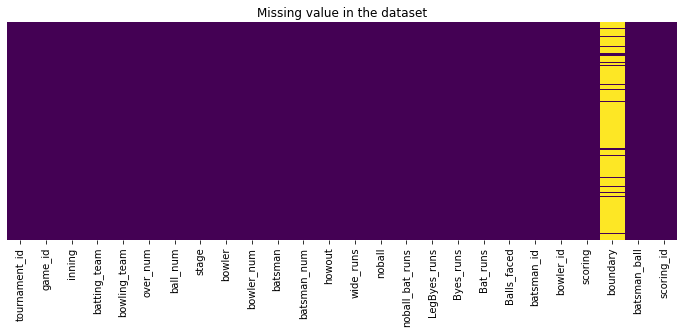

In [362]:
plt.figure(figsize=(12,4))
sns.heatmap(test_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [363]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tournament_id    345 non-null    int64 
 1   game_id          345 non-null    int64 
 2   inning           345 non-null    int64 
 3   batting_team     345 non-null    object
 4   bowling_team     345 non-null    object
 5   over_num         345 non-null    int64 
 6   ball_num         345 non-null    int64 
 7   stage            345 non-null    object
 8   bowler           345 non-null    object
 9   bowler_num       345 non-null    int64 
 10  batsman          345 non-null    object
 11  batsman_num      345 non-null    int64 
 12  howout           345 non-null    object
 13  wide_runs        345 non-null    int64 
 14  noball           345 non-null    int64 
 15  noball_bat_runs  345 non-null    int64 
 16  LegByes_runs     345 non-null    int64 
 17  Byes_runs        345 non-null    in

In [364]:
test_df['boundary'].value_counts()

four    28
six      3
Name: boundary, dtype: int64

In [365]:
test_df=test_df.replace({"boundary":{"six":"6","four":"4",np.nan:0}})
test_df['boundary'] = test_df['boundary'].astype(int)

In [366]:
test_df['stage'].value_counts()

middle       192
powerplay    116
death         37
Name: stage, dtype: int64

In [367]:
test_df=test_df.replace({"stage":{"powerplay":"1","middle":"2","death":"3",np.nan:0}})
test_df['stage'] = test_df['stage'].astype(int)

In [368]:
test_df['wickets'] = test_df['howout']

In [369]:
test_df['wickets'].value_counts()

notout     325
Catch       11
Bowled       4
RunOut       2
LBW          2
Stumped      1
Name: wickets, dtype: int64

In [370]:
test_df=test_df.replace({"wickets":{"notout":"0","Catch":"1","RunOut":"1","Bowled":"1","LBW":"1","Stumped":"1",np.nan:0}})

In [371]:
test_df['wickets'] = test_df['wickets'].astype(int)

In [372]:
test_df['wickets'] = test_df.groupby(['inning'])['wickets'].cumsum()

In [373]:
test_df['howout'].value_counts()

notout     325
Catch       11
Bowled       4
RunOut       2
LBW          2
Stumped      1
Name: howout, dtype: int64

In [374]:
test_df=test_df.replace({"howout":{"notout":"0","Catch":"1","RunOut":"2","Bowled":"3","Stumped":"4","LBW":"5",np.nan:0}})

In [375]:
test_df['howout'] = test_df['howout'].astype(int)

In [376]:
test_df["Overs"] = test_df['over_num'].map(str) + '.' + test_df['ball_num'].map(str)

In [377]:
test_df['Overs'] = test_df['Overs'].astype(float)

In [378]:
test_df['EachBallRun'] = test_df['wide_runs']+test_df['noball']+test_df['Byes_runs']+test_df['Bat_runs']+test_df['LegByes_runs']

In [379]:
test_df['Total_runs'] = test_df.groupby(['inning'])['EachBallRun'].cumsum()

In [380]:
test_df['scoring'].value_counts()

dot ball              200
strike rotation       100
boundaries             31
aggressive running     14
Name: scoring, dtype: int64

In [381]:
test_df=test_df.replace({"scoring":{"dot ball":"1","strike rotation":"2","aggressive running":"3","boundaries":"4",np.nan:0}})

In [382]:
test_df['scoring'] = test_df['scoring'].astype(int)

In [383]:
test_df.columns

Index(['tournament_id', 'game_id', 'inning', 'batting_team', 'bowling_team',
       'over_num', 'ball_num', 'stage', 'bowler', 'bowler_num', 'batsman',
       'batsman_num', 'howout', 'wide_runs', 'noball', 'noball_bat_runs',
       'LegByes_runs', 'Byes_runs', 'Bat_runs', 'Balls_faced', 'batsman_id',
       'bowler_id', 'scoring', 'boundary', 'batsman_ball', 'scoring_id',
       'wickets', 'Overs', 'EachBallRun', 'Total_runs'],
      dtype='object')

In [384]:
columns_to_remove = ['tournament_id', 'game_id', 'inning','over_num','ball_num', 'bowler','batsman','batsman_ball','Balls_faced','batsman_id','bowler_id','scoring_id']
test_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [385]:
test_df.head()

,batting_team,bowling_team,stage,bowler_num,batsman_num,howout,wide_runs,noball,noball_bat_runs,LegByes_runs,Byes_runs,Bat_runs,scoring,boundary,wickets,Overs,EachBallRun,Total_runs
0,ACCENTURE,ROYAL ENFIELD,1,1,1,0,0,0,0,0,0,1,2,0,0,1.1,1,1
1,ACCENTURE,ROYAL ENFIELD,1,1,2,0,0,0,0,0,0,0,1,0,0,1.2,0,1
2,ACCENTURE,ROYAL ENFIELD,1,1,2,0,0,0,0,0,0,4,4,4,0,1.3,4,5
3,ACCENTURE,ROYAL ENFIELD,1,1,2,0,2,0,0,0,0,0,1,0,0,1.4,2,7
4,ACCENTURE,ROYAL ENFIELD,1,1,1,0,0,0,0,0,0,3,3,0,0,1.4,3,10


In [386]:
test_df.head(195)

,batting_team,bowling_team,stage,bowler_num,batsman_num,howout,wide_runs,noball,noball_bat_runs,LegByes_runs,Byes_runs,Bat_runs,scoring,boundary,wickets,Overs,EachBallRun,Total_runs
0,ACCENTURE,ROYAL ENFIELD,1,1,1,0,0,0,0,0,0,1,2,0,0,1.1,1,1
1,ACCENTURE,ROYAL ENFIELD,1,1,2,0,0,0,0,0,0,0,1,0,0,1.2,0,1
2,ACCENTURE,ROYAL ENFIELD,1,1,2,0,0,0,0,0,0,4,4,4,0,1.3,4,5
3,ACCENTURE,ROYAL ENFIELD,1,1,2,0,2,0,0,0,0,0,1,0,0,1.4,2,7
4,ACCENTURE,ROYAL ENFIELD,1,1,1,0,0,0,0,0,0,3,3,0,0,1.4,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ACCENTURE,ROYAL ENFIELD,3,3,11,2,0,0,0,0,0,0,1,0,10,30.5,0,200
191,ROYAL ENFIELD,ACCENTURE,1,1,1,0,0,0,0,0,0,0,1,0,0,1.1,0,0
192,ROYAL ENFIELD,ACCENTURE,1,1,1,0,0,0,0,0,0,1,2,0,0,1.2,1,1
193,ROYAL ENFIELD,ACCENTURE,1,1,2,0,0,0,0,0,0,0,1,0,0,1.3,0,1


In [387]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batting_team     345 non-null    object 
 1   bowling_team     345 non-null    object 
 2   stage            345 non-null    int32  
 3   bowler_num       345 non-null    int64  
 4   batsman_num      345 non-null    int64  
 5   howout           345 non-null    int32  
 6   wide_runs        345 non-null    int64  
 7   noball           345 non-null    int64  
 8   noball_bat_runs  345 non-null    int64  
 9   LegByes_runs     345 non-null    int64  
 10  Byes_runs        345 non-null    int64  
 11  Bat_runs         345 non-null    int64  
 12  scoring          345 non-null    int32  
 13  boundary         345 non-null    int32  
 14  wickets          345 non-null    int32  
 15  Overs            345 non-null    float64
 16  EachBallRun      345 non-null    int64  
 17  Total_runs      

,batting_team,bowling_team,stage,bowler_num,batsman_num,howout,wide_runs,noball,noball_bat_runs,LegByes_runs,Byes_runs,Bat_runs,scoring,boundary,wickets,Overs,EachBallRun,Total_runs
0,ACCENTURE,ROYAL ENFIELD,1,1,1,0,0,0,0,0,0,1,2,0,0,1.1,1,1
1,ACCENTURE,ROYAL ENFIELD,1,1,2,0,0,0,0,0,0,0,1,0,0,1.2,0,1
2,ACCENTURE,ROYAL ENFIELD,1,1,2,0,0,0,0,0,0,4,4,4,0,1.3,4,5
3,ACCENTURE,ROYAL ENFIELD,1,1,2,0,2,0,0,0,0,0,1,0,0,1.4,2,7
4,ACCENTURE,ROYAL ENFIELD,1,1,1,0,0,0,0,0,0,3,3,0,0,1.4,3,10


In [424]:
encoded_df = pd.get_dummies(data=test_df, columns=['batting_team', 'bowling_team'])
encoded_df.head(134)

,stage,bowler_num,batsman_num,howout,wide_runs,noball,noball_bat_runs,LegByes_runs,Byes_runs,Bat_runs,scoring,boundary,wickets,Overs,EachBallRun,Total_runs,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD
0,1,1,1,0,0,0,0,0,0,1,2,0,0,1.1,1,1,1,0,0,1
1,1,1,2,0,0,0,0,0,0,0,1,0,0,1.2,0,1,1,0,0,1
2,1,1,2,0,0,0,0,0,0,4,4,4,0,1.3,4,5,1,0,0,1
3,1,1,2,0,2,0,0,0,0,0,1,0,0,1.4,2,7,1,0,0,1
4,1,1,1,0,0,0,0,0,0,3,3,0,0,1.4,3,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2,4,6,0,0,0,0,0,0,0,1,0,4,20.6,0,140,1,0,0,1
130,2,5,7,0,0,0,0,0,0,1,2,0,4,21.1,1,141,1,0,0,1
131,2,5,6,0,0,0,0,0,0,1,2,0,4,21.2,1,142,1,0,0,1
132,2,5,7,0,0,0,0,0,0,0,1,0,4,21.3,0,142,1,0,0,1


In [389]:
encoded_df.columns

Index(['stage', 'bowler_num', 'batsman_num', 'howout', 'wide_runs', 'noball',
       'noball_bat_runs', 'LegByes_runs', 'Byes_runs', 'Bat_runs', 'scoring',
       'boundary', 'wickets', 'Overs', 'EachBallRun', 'Total_runs',
       'batting_team_ACCENTURE ', 'batting_team_ROYAL ENFIELD',
       'bowling_team_ACCENTURE ', 'bowling_team_ROYAL ENFIELD'],
      dtype='object')

In [397]:
encoded_df = encoded_df[['batting_team_ACCENTURE ', 'batting_team_ROYAL ENFIELD',
       'bowling_team_ACCENTURE ', 'bowling_team_ROYAL ENFIELD','stage', 'bowler_num', 'batsman_num', 'howout', 'wide_runs', 'noball',
       'noball_bat_runs', 'LegByes_runs', 'Byes_runs', 'Bat_runs', 'scoring',
       'boundary', 'wickets', 'Overs', 'EachBallRun', 'Total_runs']]

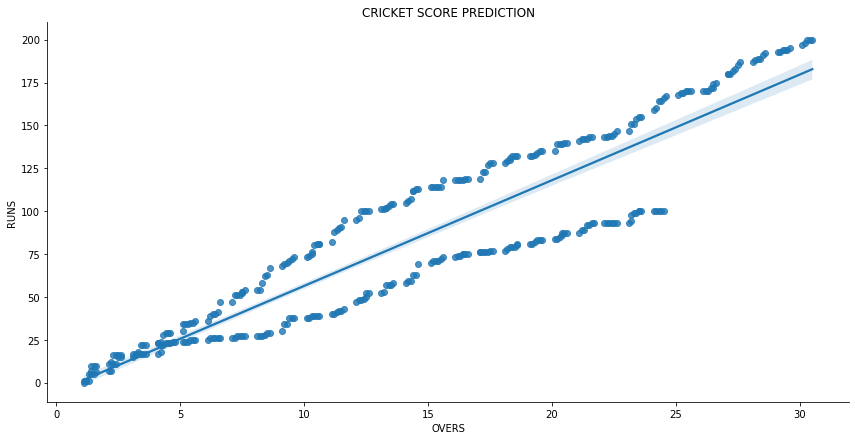

In [402]:
sns.lmplot(x='Overs',y='Total_runs',data=encoded_df,aspect=2,height=6)
plt.xlabel('OVERS')
plt.ylabel('RUNS')
plt.title('CRICKET SCORE PREDICTION');

In [403]:
from sklearn.model_selection import train_test_split
X = encoded_df.drop('Total_runs',axis=1) # Independet variable
y = encoded_df['Total_runs'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [409]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [414]:
output=regressor.predict(X_test)
output

array([ 19.0750725 ,  -0.59634106,  46.3926823 ,  20.84662587,
       143.19890729, 167.92669787, 188.62669802,  80.40662281,
        88.75715179, 135.68116827,  82.55287268,  35.49669936,
        86.86250673,  62.74886735, 180.63742151, 140.79777374,
        52.61359279, 188.60281682,  37.93570975,  49.52710629,
       175.33023099,  28.85658413,  64.22275907,  93.27113719,
        20.79020231,  49.10706044,  63.8678166 , 182.00924232,
       127.96770742, 121.12838169,  23.71811897,  18.19579322,
       106.82484078,  87.64963996, 183.33837794,  24.00235029,
        94.64657622,  96.39241356,  39.15880699, 106.38746371,
       103.77279164,  84.45298178,  46.55405047, 183.25520886,
       141.33680459, 178.7971785 ,  50.87019814,  78.20706467,
        52.88248061, 123.31943263,  52.70699462,  63.19344633,
        73.9918363 ,  49.883511  , 111.76837815,  27.82727139,
        86.7167544 ,  50.33116729,  74.74642717,  91.62821274,
        50.06699269, 180.09839066, 133.0644747 , 106.58

C:\Users\SivasathivelMoorthy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_runs', ylabel='Density'>

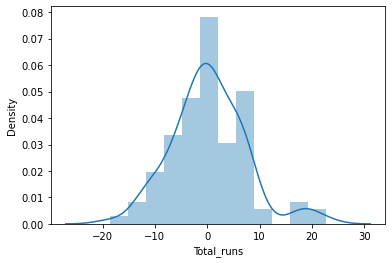

In [417]:
sns.distplot(y_test-output)


In [418]:
regressor.score(X_test,y_test)

0.9826941023036545

In [420]:
X_test.head()

,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD,stage,bowler_num,batsman_num,howout,wide_runs,noball,noball_bat_runs,LegByes_runs,Byes_runs,Bat_runs,scoring,boundary,wickets,Overs,EachBallRun
225,0,1,1,0,1,2,3,0,0,0,0,0,0,1,2,0,2,6.2,1
195,0,1,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,1.5,0
259,0,1,1,0,2,1,6,0,0,0,0,0,0,1,2,0,5,11.6,1
14,1,0,0,1,1,1,2,0,0,0,0,0,0,0,1,0,1,3.2,0
134,1,0,0,1,2,5,7,0,0,0,0,0,0,1,2,0,4,21.5,1


In [427]:
output=regressor.predict([[1,0,0,1,2,5,7,0,0,0,0,0,0,1,2,0,4,30.5,1]])
output

array([211.11208574])

In [429]:
encoded_df.head(192)

,stage,bowler_num,batsman_num,howout,wide_runs,noball,noball_bat_runs,LegByes_runs,Byes_runs,Bat_runs,scoring,boundary,wickets,Overs,EachBallRun,Total_runs,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD
0,1,1,1,0,0,0,0,0,0,1,2,0,0,1.1,1,1,1,0,0,1
1,1,1,2,0,0,0,0,0,0,0,1,0,0,1.2,0,1,1,0,0,1
2,1,1,2,0,0,0,0,0,0,4,4,4,0,1.3,4,5,1,0,0,1
3,1,1,2,0,2,0,0,0,0,0,1,0,0,1.4,2,7,1,0,0,1
4,1,1,1,0,0,0,0,0,0,3,3,0,0,1.4,3,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,3,3,10,0,0,0,0,0,0,1,2,0,9,30.2,1,198,1,0,0,1
188,3,3,11,0,0,0,0,0,0,2,3,0,9,30.3,2,200,1,0,0,1
189,3,3,11,0,0,0,0,0,0,0,1,0,9,30.4,0,200,1,0,0,1
190,3,3,11,2,0,0,0,0,0,0,1,0,10,30.5,0,200,1,0,0,1
